# high-pass filtering, spurious oscillations

In [1]:
import xarray as xr
#import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import signal

### generate a synthetic timeseries

In [25]:
dt = 1/24/4 # days
T = 5

ds = xr.Dataset(None, coords=dict(time=("time", np.arange(0,T,dt))))
ds["x"] = (ds.time*0+1).where( (ds.time>T/4) & (ds.time<T*3/4), other=0)

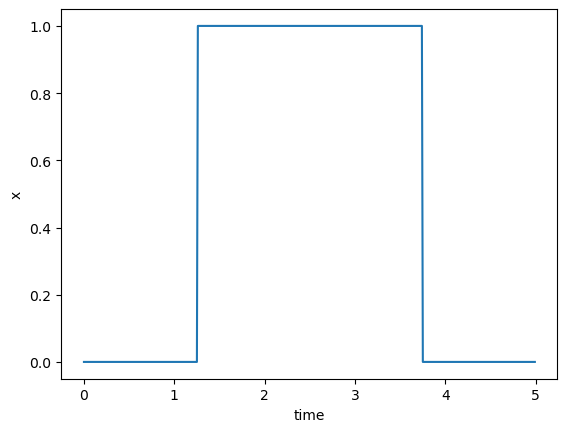

In [26]:
ds["x"].plot()

### filter

In [27]:
def high_pass_filter(cutoff, T_filter=1):
    """ generate a high-pass filter"""

    numtaps = int(T_filter / dt)
    numtaps |= 1 # ensures numtaps is odd
    
    h = signal.firwin(
            numtaps, cutoff=[cutoff], pass_zero=False, fs=1 / dt, scale=True
        )
    
    return h
    
def filter_response(h):
    """Returns the frequency response"""
    w, hh = signal.freqz(h, worN=8000, fs=1 / dt)
    return hh, w

In [28]:
omega = 0.01e-3*86400 # 0.01mHz to cycles per day
h = high_pass_filter(omega, T_filter=2)

H, f = filter_response(h)
filt = lambda v: np.convolve(v, h, mode="same")

Text(0.5, 0, '[cpd]')

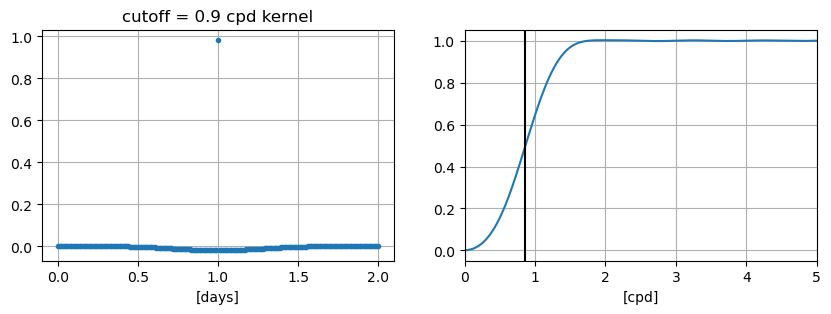

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

ax = axes[0]
ax.plot(np.arange(0,len(h))*dt, h, ".")
ax.grid()
ax.set_xlabel("[days]")
ax.set_title(f"cutoff = {omega:.1f} cpd kernel")

ax = axes[1]
ax.plot(f, np.abs(H))
# ax.set_yscale("log")
# ax.set_xscale("log")
ax.axvline(omega, color="k")
ax.set_xlim(0, 5)
ax.grid()
ax.set_xlabel("[cpd]")

In [30]:
ds["x_filtered"] = ("time", filt(ds.x))

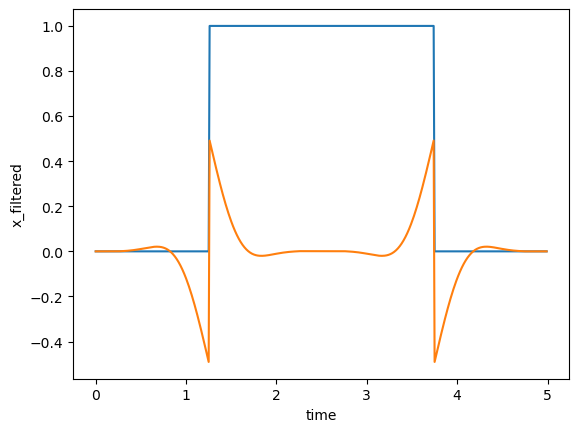

In [31]:
ds["x"].plot()
ds["x_filtered"].plot()

## expand and show as colorbar

In [32]:
ds = ds.expand_dims(r=np.arange(0,10))

#### original signal

Text(0.5, 1.0, 'original signal')

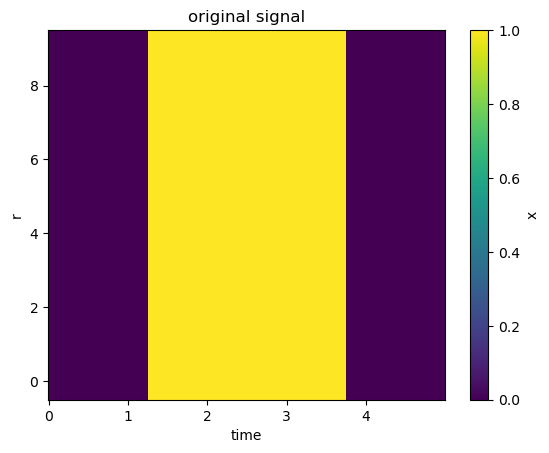

In [33]:
fig, ax = plt.subplots(1,1)
ds["x"].plot()
ax.set_title("original signal")

Text(0.5, 1.0, 'original signal')

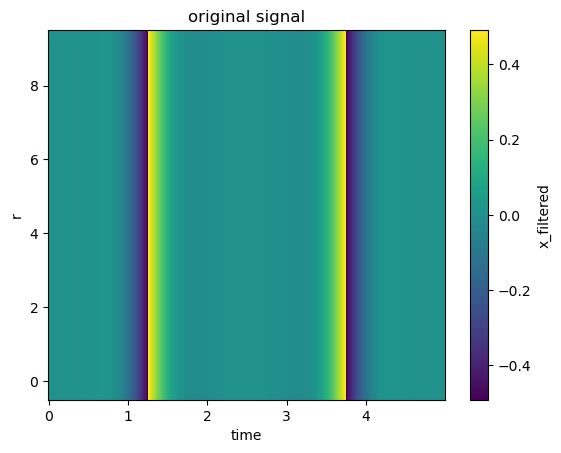

In [34]:
fig, ax = plt.subplots(1,1)
ds["x_filtered"].plot(cmap="viridis")
ax.set_title("original signal")